# 통계

# 1.무작위성 검정

A 쇼핑몰은 새로운 브랜드 런칭 이벤트를 지원하기 위하여 매장 방문 고객에게 상품 1만원권을 배포하였다. 매장 오픈 후 최초 20명의 방문이력을 조사한 결과 아래의 순서로 멤버십을 소지한 사람(1)과 소지하지 않은 사람(0)이 방문하였다. A 쇼핑몰의 CRM 팀에서는 이러한 마케팅 행사가 한쪽에 치우치지 않고 공정하게 이루어졌는지를 판단하기 위해 무작위성 검정을 진행하고자 한다. 

**1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0** 

이 문제를 위한 가설을 설정하고 검정하시오.

In [1]:
data1 = [1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0]

In [2]:
len(data1)

20

In [3]:
import pandas as pd
import numpy as np

df1 = pd.DataFrame(data1, columns = ['visit'])
df1

,visit
0,1
1,0
2,0
3,0
4,0
5,1
6,1
7,1
8,1
9,0


## 비모수 통계분석(Run Test)

1) 연구가설과 귀무가설 작성

- 귀무가설(H0) : 멤버십을 소지한 사람과 소지하지 않은 사람은 연관이 없다
- 대립가설(H1) : 멤버십을 소지한 사람과 소지하지 않은 사람이 연관이 있다

2) 가설 채택

In [4]:
from statsmodels.sandbox.stats.runs import runstest_1samp

runstest_1samp(df1['visit'])

(-1.8277470669267506, 0.06758752074917526)

run test 분석 결과 통계값은 -1.8277 이고 p value 값은 0.0675로 유의수준 0.05보다 크므로 귀무가설을 기각하지 못한다. 즉, 매장을 방문한 사람 중에 멤버십을 소지한 사람과 소지하지 않은 사람은 연관이 없다.

# 2. 두 변수의 비교

### 　

A 쇼핑 마케팅 팀에서는 새로운 로열티 프로그램을 제공하며 멤버십 기능을 강화하였다. 로열티 프로그램 만족도의 변화가 통계적으로 유의한 지 알아보기 위해 도입 전과 후의 고객만족도에 대한 검정을 수행하고자 한다.

**사용데이터 : Ashopping.csv    **
- encoding="CP949" 

이 문제를 위한 가설을 설정하고 검정하시오.

In [5]:
df2 = pd.read_csv('./Ashopping.csv', encoding = 'cp949')
df2

,고객ID,멤버쉽_프로그램_가입전_만족도,멤버쉽_프로그램_가입후_만족도
0,1,5,7
1,2,2,3
2,3,6,6
3,4,3,5
4,5,5,6
...,...,...,...
995,996,6,6
996,997,3,4
997,998,4,5
998,999,5,6


## 대응표본 T-검정(Paired Sample T-Teset)

1) 연구가설과 귀무가설 작성(단측검정? 양측검정?)

- 귀무가설(H0) : 로열티 프로그램 도입 전과 후의 고객만족도의 차이가 없다
- 대립가설(H1) : 로열티 프로그램 도입 전과 후의 고객만족도의 차이가 있다

2) 정규성 검정

- 귀무가설(H0) : 표본분포가 정규성을 따른다
- 대립가설(H1) : 표본분포가 정규성을 따르지 않는다

In [6]:
import scipy.stats as stats
from scipy.stats import shapiro

print('가입전 정규성 검정 : ', shapiro(df2['멤버쉽_프로그램_가입전_만족도']))
print('가입후 정규성 검정 : ', shapiro(df2['멤버쉽_프로그램_가입후_만족도']))

가입전 정규성 검정 :  ShapiroResult(statistic=0.932883620262146, pvalue=8.848468950340511e-21)
가입후 정규성 검정 :  ShapiroResult(statistic=0.8878732919692993, pvalue=2.6420671186106034e-26)


가입전, 가입후 모두 p value값이 0.05보다 작으므로 귀무가설을 기각하고 대립가설을 채택한다. 즉, 정규성을 만족하지 못한다.

3) 정규성을 만족하지 못했으므로 윌콕슨의 부호 순위 검정 진행

In [7]:
stats.wilcoxon(df2['멤버쉽_프로그램_가입후_만족도'], df2['멤버쉽_프로그램_가입전_만족도'],
              alternative = 'greater')

# 단측검정 after>before

WilcoxonResult(statistic=244682.5, pvalue=1.3071313981607809e-102)

대응표본 T검정 후 검정통계치 값은 244,682.5 이며, p value는 유의수준인 0.05보다 작으므로 귀무가설을 기각하고 대립가설을 채택한다. 로열티 프로그램 도입 전과 후의 고객만족도 차이는 통계적으로 유의하며, 프로그램 도입 후 고객만족도가 증가하였다.

In [8]:
print('가입전 만족도 평균 : ', df2['멤버쉽_프로그램_가입전_만족도'].mean())
print('가입후 만족도 평균 : ', df2['멤버쉽_프로그램_가입후_만족도'].mean())

가입전 만족도 평균 :  4.296
가입후 만족도 평균 :  5.524


# 3. 알고리즘 적용 전후 평균 배송시간 비교

전자회사 C사는 기존의 물류 알고리즘보다 개선되었다고 알려진 새로운 물류 경로 최적화 알고리즘을 도입해 상품의 배송시간을 단축하고자 한다. 이에 전국 7개의 물류센터에 실험적으로 적용해보고 실제로 얼마나 더 나은 성과를 보이는지 검증해보고자 한다. 전국 7개의 물류센터에서 새로운 알고리즘의 적용 전 평균 배송시간과 적용 후의 평균 배송시간은 다음과 같다. 

|물류센터|기존 알고리즘|신규 알고리즘|
|---|---|---|
|1|10|8|
|2|30|27|
|3|9|16|
|4|21|25|
|5|35|30|
|6|12|13|
|7|17|11|

이 문제를 위한 가설을 설정하고 검정하시오.

In [9]:
df3 = pd.DataFrame({'물류센터' : [1,2,3,4,5,6,7],
                  '기존 알고리즘' : [10,30,9,21,35,12,17],
                  '신규 알고리즘' : [8,27,16,25,30,13,11]})

df3

,물류센터,기존 알고리즘,신규 알고리즘
0,1,10,8
1,2,30,27
2,3,9,16
3,4,21,25
4,5,35,30
5,6,12,13
6,7,17,11


## 독립표본 T-검정(Independent Sample T-Teset)

1) 연구가설과 귀무가설 작성

- 귀무가설(H0) : 물류센터에서 새로운 알고리즘 적용 전과 후의 평균 배송시간에는 차이가 없다
- 대립가설(H1) : 물류센터에서 새로운 알고리즘 적용 전과 후의 평균 배송시간에는 차이가 있다

2) 정규성 검정

- 귀무가설(H0) : 표본분포가 정규성을 따른다
- 대립가설(H1) : 표본분포가 정규성을 따르지 않는다

In [10]:
import scipy.stats as stats
from scipy.stats import shapiro


print('적용전 정규성 검정 : ', shapiro(df3['기존 알고리즘']))
print('적용후 정규성 검정 : ', shapiro(df3['신규 알고리즘']))

적용전 정규성 검정 :  ShapiroResult(statistic=0.9005728363990784, pvalue=0.3344639539718628)
적용후 정규성 검정 :  ShapiroResult(statistic=0.9118472933769226, pvalue=0.40881282091140747)


신규알고리즘 적용전, 적용후 모두 p value 값이 유의수준인 0.05보다 크므로 귀무가설을 기각하지 못한다. 즉, 표본분포가 정규성을 따른다.

3) 등분산성 검정

In [11]:
# 귀무가설(H0) : 등분산성을 따른다
# 대립가설(H1) : 등분산성을 따르지 않는다

stats.levene(df3['기존 알고리즘'], df3['신규 알고리즘'])

LeveneResult(statistic=0.06058158319870747, pvalue=0.8097387594799585)

등분산성 검정 결과, p value 값이 유의수준인 0.05보다 크므로 귀무가설을 기각하지 못한다. 즉, 등분산성을 따른다

4) 독립 T 검정

In [12]:
stats.ttest_ind(df3['기존 알고리즘'], df3['신규 알고리즘'], equal_var = True) # 등분산성 만족

Ttest_indResult(statistic=0.11350087076783275, pvalue=0.9115102566395137)

독립 t 검정 결과 검정통계치는 0.1135 이고, p value는 0.9115 이다. 유의수준인 0.05보다 크므로 귀무가설을 기각하지 못한다. 즉, 물류센터에서 새로운 알고리즘 적용 전과 적용 후의 평균 배송시간에는 통계적으로 차이가 없다.

In [13]:
print('적용전 배송시간 평균 : ' , df3['기존 알고리즘'].mean())
print('적용후 배송시간 평균 : ' , df3['신규 알고리즘'].mean())

적용전 배송시간 평균 :  19.142857142857142
적용후 배송시간 평균 :  18.571428571428573


# 4. 혜택별 고객 선호도 차이 비교

A 쇼핑에서는 VIP 고객들을 대상으로 새로운 혜택을 제공하고자 한다. 샘플증정, 포인트 추가, 무료배송, 할인쿠폰 등 4가지 혜택에 대한 5개 지역별 고객들에 대한 사전 선호도 조사를 실시한 결과 지역별 서비스에 대한 서열은 아래 표와 같이 정리되었다. 혜택 별 고객 선호도에 차이가 있는지를 검정을 통해 알아보자. 

|지역|샘플증정|포인트추가|무료배송|할인쿠폰|
|---|---|---|---|---|
|서울경기|1|3|2|4|
|강원|2|3|4|1|
|충청|1|3|4|2|
|경상|1|2|4|3|
|전라|2|1|3|4|

이 문제를 위한 가설을 설정하고 검정하시오.

In [14]:
df4 = pd.DataFrame({'지역' : ['서울경기','강원','충청','경상','전라'],
                   '샘플증정' : [1,2,1,1,2],
                   '포인트추가' : [3,3,3,2,1],
                   '무료배송' : [2,4,4,4,3],
                   '할인쿠폰' : [4,1,2,3,4]})

# df4.set_index('지역', inplace = True)
df4 

,지역,샘플증정,포인트추가,무료배송,할인쿠폰
0,서울경기,1,3,2,4
1,강원,2,3,4,1
2,충청,1,3,4,2
3,경상,1,2,4,3
4,전라,2,1,3,4


-------------------------------------------------

In [15]:
df4_melt = df4.melt(id_vars = ['지역'], var_name = '혜택', value_name = '고객선호도')
df4_melt

,지역,혜택,고객선호도
0,서울경기,샘플증정,1
1,강원,샘플증정,2
2,충청,샘플증정,1
3,경상,샘플증정,1
4,전라,샘플증정,2
5,서울경기,포인트추가,3
6,강원,포인트추가,3
7,충청,포인트추가,3
8,경상,포인트추가,2
9,전라,포인트추가,1


## 일원배치 분산분석(One-way ANOVA)

1) 연구가설과 귀무가설 작성

- 귀무가설(H0) : 4개의 혜택별 고객 선호도의 평균에는 차이가 없다(즉 모두 같다)
- 대립가설(H1) : 4개의 혜택별 고객 선호도의 평균에는 차이가 있다(즉 모두 같지는 않다)

2) 정규성 검정

- 귀무가설(H0) : 표본분포가 정규성을 따른다
- 대립가설(H1) : 표본분포가 정규성을 따르지 않는다

In [16]:
import scipy.stats as stats
from scipy.stats import shapiro

In [17]:
df4.columns[1:]

Index(['샘플증정', '포인트추가', '무료배송', '할인쿠폰'], dtype='object')

In [18]:
for benefit in df4.columns[1:]:
    print(benefit, shapiro(df4[benefit]))

샘플증정 ShapiroResult(statistic=0.6840287446975708, pvalue=0.006469968240708113)
포인트추가 ShapiroResult(statistic=0.7709078788757324, pvalue=0.04595423862338066)
무료배송 ShapiroResult(statistic=0.7709078788757324, pvalue=0.04595423862338066)
할인쿠폰 ShapiroResult(statistic=0.902019739151001, pvalue=0.421149343252182)


In [19]:
shapiro(df4.iloc[:,1:])

ShapiroResult(statistic=0.863353431224823, pvalue=0.008997296914458275)

-----------------------------------------------------------------

In [20]:
target_list = df4_melt['혜택'].unique()
target_list

array(['샘플증정', '포인트추가', '무료배송', '할인쿠폰'], dtype=object)

In [21]:
sample = df4_melt[df4_melt['혜택']==target_list[0]]['고객선호도']
point =  df4_melt[df4_melt['혜택']==target_list[1]]['고객선호도']
free =  df4_melt[df4_melt['혜택']==target_list[2]]['고객선호도']
discount =  df4_melt[df4_melt['혜택']==target_list[3]]['고객선호도']

In [22]:
print(target_list[0], shapiro(sample))
print(target_list[1], shapiro(point))
print(target_list[2], shapiro(free))
print(target_list[3], shapiro(discount))
print('전체 ', shapiro(df4_melt['고객선호도']))

샘플증정 ShapiroResult(statistic=0.6840287446975708, pvalue=0.006469968240708113)
포인트추가 ShapiroResult(statistic=0.7709078788757324, pvalue=0.04595423862338066)
무료배송 ShapiroResult(statistic=0.7709078788757324, pvalue=0.04595423862338066)
할인쿠폰 ShapiroResult(statistic=0.902019739151001, pvalue=0.421149343252182)
전체  ShapiroResult(statistic=0.863353431224823, pvalue=0.008997296914458275)


정규성검정결과 할인쿠폰 혜택에서 p value 값이 0.05보다 크므로 귀무가설을 기각하지 못해 정규성을 만족하지만, 다른 혜택들은 p value가 0.05보다 작으므로 귀무가설을 기각하고 대립가설을 채택한다. 즉, 정규성을 만족하지 못한다.


전체 데이터프레임 정규성 검정결과 통계치는 0.8633이고 p value 값이 유의수준인 0.05보다 작으므로 귀무가설을 기각하고 대립가설을 채택한다. 즉, 정규성을 만족하지 못한다

3) 정규성을 만족하지 못하므로 kruskal 검정 

In [23]:
stats.kruskal(df4['샘플증정'],df4['포인트추가'],df4['무료배송'],df4['할인쿠폰'])

KruskalResult(statistic=8.055999999999997, pvalue=0.044868421607416054)

-------------------------------------------------------------

In [24]:
stats.kruskal(sample, point, free, discount)

KruskalResult(statistic=8.055999999999997, pvalue=0.044868421607416054)

kruskal 분산분석 진행시 통계치는 8.0559 이고 p value는 0.0448 이므로 유의수준인 0.05보다 작으므로 귀무가설을 기각하고 대립가설을 채택한다. 즉, 4개의 혜택별 고객 선호도의 평균에는 차이가 있다.

4) 사후검정

- 귀무가설(H0) : 집단들 사이의 평균은 같다
- 대립가설(H1) : 집단들 사이의 평균은 같지 않다

In [25]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(data = df4_melt['고객선호도'], groups = df4_melt['혜택'])
mc

In [26]:
tuekeyhsd = mc.tukeyhsd(alpha = 0.05)
tuekeyhsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
무료배송,샘플증정,-2.0,0.0198,-3.7167,-0.2833,True
무료배송,포인트추가,-1.0,0.3729,-2.7167,0.7167,False
무료배송,할인쿠폰,-0.6,0.7316,-2.3167,1.1167,False
샘플증정,포인트추가,1.0,0.3729,-0.7167,2.7167,False
샘플증정,할인쿠폰,1.4,0.1317,-0.3167,3.1167,False
포인트추가,할인쿠폰,0.4,0.9,-1.3167,2.1167,False


In [27]:
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname = 'c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family = font_name)

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


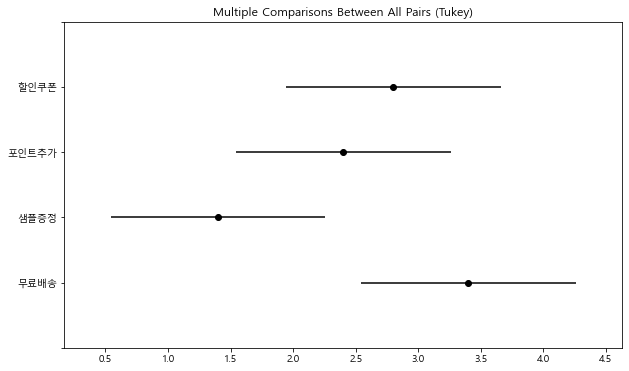

In [28]:
fig = tuekeyhsd.plot_simultaneous()

- 모든 집단 수준에 대하여 두 집단씩 짝을 지어 각각 다중 비교를 수행해 보면, 무료배송~샘플증정의 p-adj 값만 0.05보다 작으므로 귀무가설을 기각한다. 즉, 무료배송혜택과 샘플증정혜택에서 고객선호도의 평균값은 통계적으로 유의한 차이가 있다는 것을 알 수 있다. 그 외 나머지는 통계적으로 유의한 차이가 없다고 해석할 수 있다.

- 무료배송과 샘플증정의 diff값이 음수 이므로 샘플증정-무료배송<0이다. 즉, 샘플증정의 평균값<무료배송의 평균값 임을 알 수 있다.

# 5. 공장종류별 공장설비 차이 비교

공장 종류(A,B,C,D)에 따라서 공장 설비(높이, 캐노피 면적)에 차이가 발생하는 지 알아보자.

In [29]:
#해당 코드를 실행하면 데이터가 로드됩니다. 

df5=pd.read_csv("https://reneshbedre.github.io/assets/posts/ancova/manova_data.csv")
df5

,plant_var,height,canopy_vol
0,A,20.0,0.70
1,A,22.0,0.80
2,A,24.0,0.95
3,A,18.0,0.60
4,A,20.0,0.74
5,A,20.0,0.76
6,A,16.0,0.84
7,A,17.0,0.66
8,A,18.0,0.99
9,A,14.0,0.80


이 문제를 위한 가설을 설정하고 검정하시오.

## 다변량 분산분석(MANOVA - 독립변수 1개 이상, 종속변수 2개 이상)

1) 연구가설과 귀무가설 작성

- 귀무가설(H0) : 4개의 공장별 공장설비(높이, 캐노피 면적)의 평균들은 모두 같다
- 대립가설(H1) : 4개의 공장별 공장설비(높이, 캐노피 면적)의 평균에는 차이가 있다(즉 모두 같지는 않다)

In [30]:
df5['plant_var'].value_counts()

A    10
B    10
D    10
C    10
Name: plant_var, dtype: int64

In [31]:
df5.groupby(by = 'plant_var').var()

,height,canopy_vol
plant_var,,
A,8.544444,0.014716
B,3.687111,0.009373
C,1.080556,0.020529
D,4.438333,0.008938


<AxesSubplot:xlabel='plant_var', ylabel='height'>

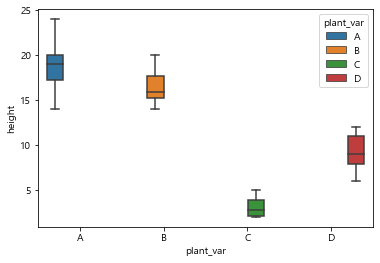

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x = 'plant_var', y = 'height', hue = 'plant_var', data = df5)

<AxesSubplot:xlabel='plant_var', ylabel='canopy_vol'>

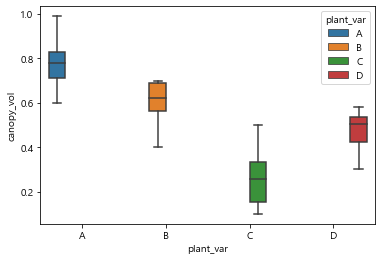

In [33]:
sns.boxplot(x = 'plant_var', y = 'canopy_vol', hue = 'plant_var', data = df5)

<AxesSubplot:xlabel='height', ylabel='canopy_vol'>

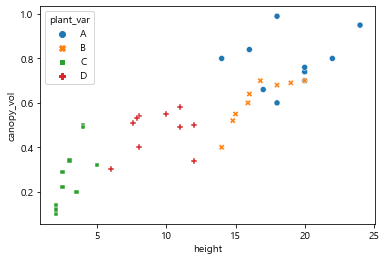

In [34]:
sns.scatterplot(x = 'height', y = 'canopy_vol', hue = 'plant_var', style = 'plant_var', data = df5)

2) 정규성 검정

- 귀무가설(H0) : 표본분포가 정규성을 따른다
- 대립가설(H1) : 표본분포가 정규성을 따르지 않는다

In [35]:
import scipy.stats as stats
from scipy.stats import shapiro

print('공장 높이 : ', shapiro(df5['height']))
print('캐노피 면적 : ', shapiro(df5['canopy_vol']))

공장 높이 :  ShapiroResult(statistic=0.9314988851547241, pvalue=0.01803121156990528)
캐노피 면적 :  ShapiroResult(statistic=0.979311466217041, pvalue=0.6639823317527771)


정규성 검정 결과 공장높이에 관해서는 p value가 0.05보다 작으므로 귀무가설을 기각하여 정규분포를 따르지 않는다. 캐노피 면적의 경우 p value 는 0.05보다 크므로 귀무가설을 채택하여 정규분포를 따른다.

3) 다변량분산분석 검정

- 귀무가설(H0) : 공장설비(공장높이, 캐노피 면적)는 공장종류와 독립적이다.
- 대립가설(H1) : 공장설비(공장높이, 캐노피 면적)는 공장종류와 독립적이지 않다.(상관관계가 있다.)

In [36]:
from statsmodels.multivariate.manova import MANOVA

maov = MANOVA.from_formula('height + canopy_vol ~ plant_var', data = df5)
print(maov.mv_test())

                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept         Value  Num DF  Den DF F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda  0.0374 2.0000 35.0000 450.0766 0.0000
         Pillai's trace  0.9626 2.0000 35.0000 450.0766 0.0000
 Hotelling-Lawley trace 25.7187 2.0000 35.0000 450.0766 0.0000
    Roy's greatest root 25.7187 2.0000 35.0000 450.0766 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
       plant_var         Value  Num DF  Den DF F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda  0.0797 6.0000 70.0000  29.6513 0.0000
         Pillai's trace  1.0365 6.0000 72.0000  12.9093 0.0000
 Hotelling-

p value값이 0.00이므로 유의수준인 0.05보다 작다. 따라서 귀무가설을 기각하고 대립가설을 채택한다. 즉, 공장설비(공장높이, 캐노피 면적)는 공장종류와 통계적으로 유의미한 관계를 갖는다.(독립적이지 않다.)

# 6. 기계학습

사용 데이터 : creditcard.csv  
데이터 출처 : 
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?resource=download

제시된 데이터는 심한 불균형 형태를 띠고 있다.  

해당사항을 고려하여  

**1) 전처리하고  
2) 모델을 구현하고  
3) 적절한 평가지표를 선정하여 점수를 구하라**


|Target|Count|Percent|
|---|---|---|
|0|284315|99.83|
|1|492|0.17|


In [37]:
df6 = pd.read_csv('./creditcard.csv')
df6

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [38]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [39]:
df6.describe().T  # 스케일링 필요

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552103e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.040130e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.698953e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.893285e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.147640e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [40]:
df6.isnull().sum()    # 결측치 없음

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [41]:
# 종속변수 분포 확인

df6['Class'].value_counts() # 분류분석이고 자료불균형 데이터

0    284315
1       492
Name: Class, dtype: int64

In [42]:
df6['Class'].value_counts(normalize = True) * 100

0    99.827251
1     0.172749
Name: Class, dtype: float64

종속변수 분포 확인

- 종속변수인 Class의 분포 비율을 확인해보면 0이 99.82%이고, 1이 0.17%이므로 불균형 데이터이다. 불균형 데이터이기 때문에 추후 샘플링 조정이 필요하다.

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


<AxesSubplot:>

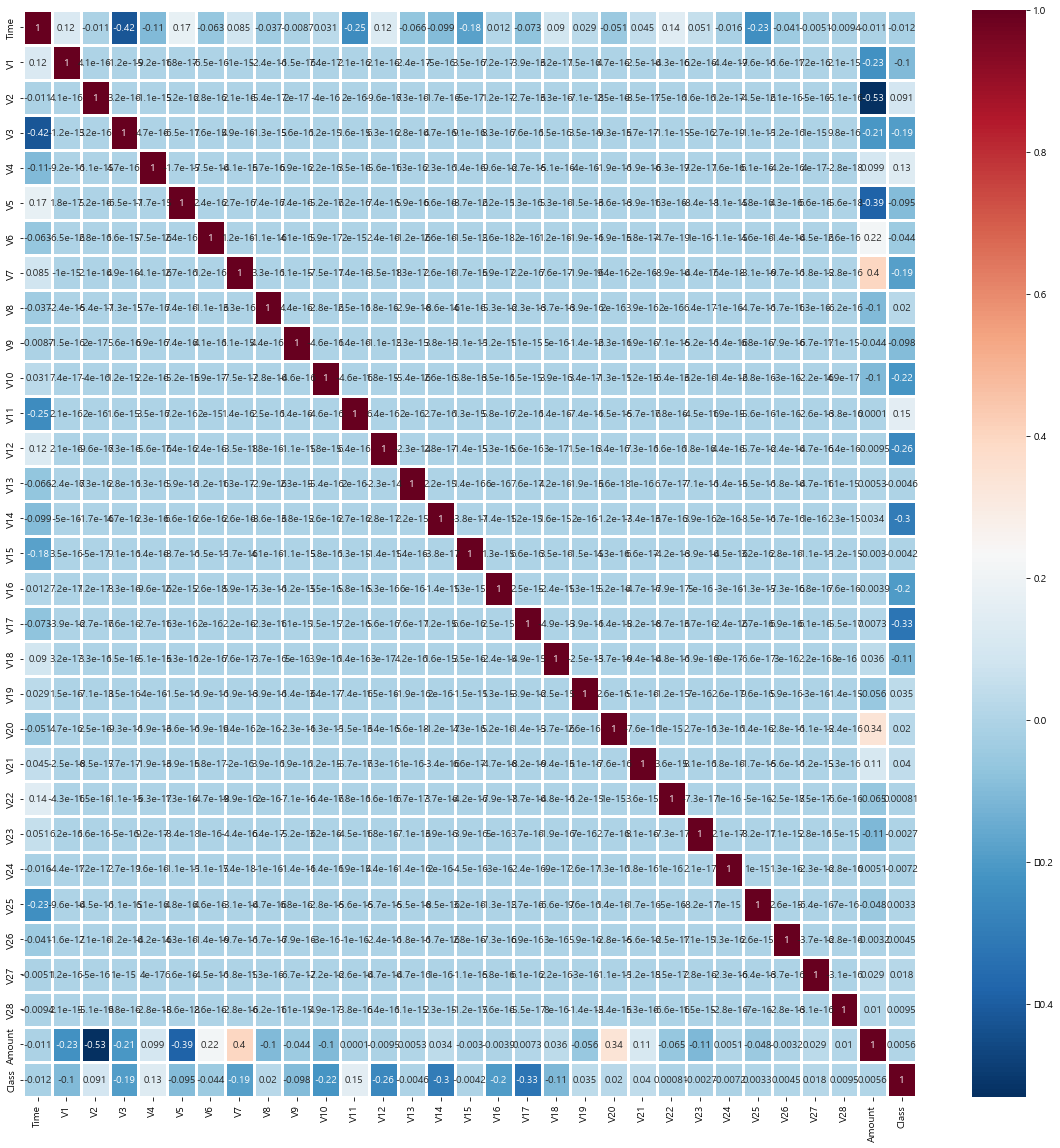

In [43]:
# 변수별 상관관계 파악

plt.figure(figsize=(20,20))

sns.heatmap(df6.corr(),
            xticklabels = df6.corr().columns,
            yticklabels = df6.corr().columns,
            cmap = 'RdBu_r',
            annot = True,
            linewidth = 3)

1) 전처리

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


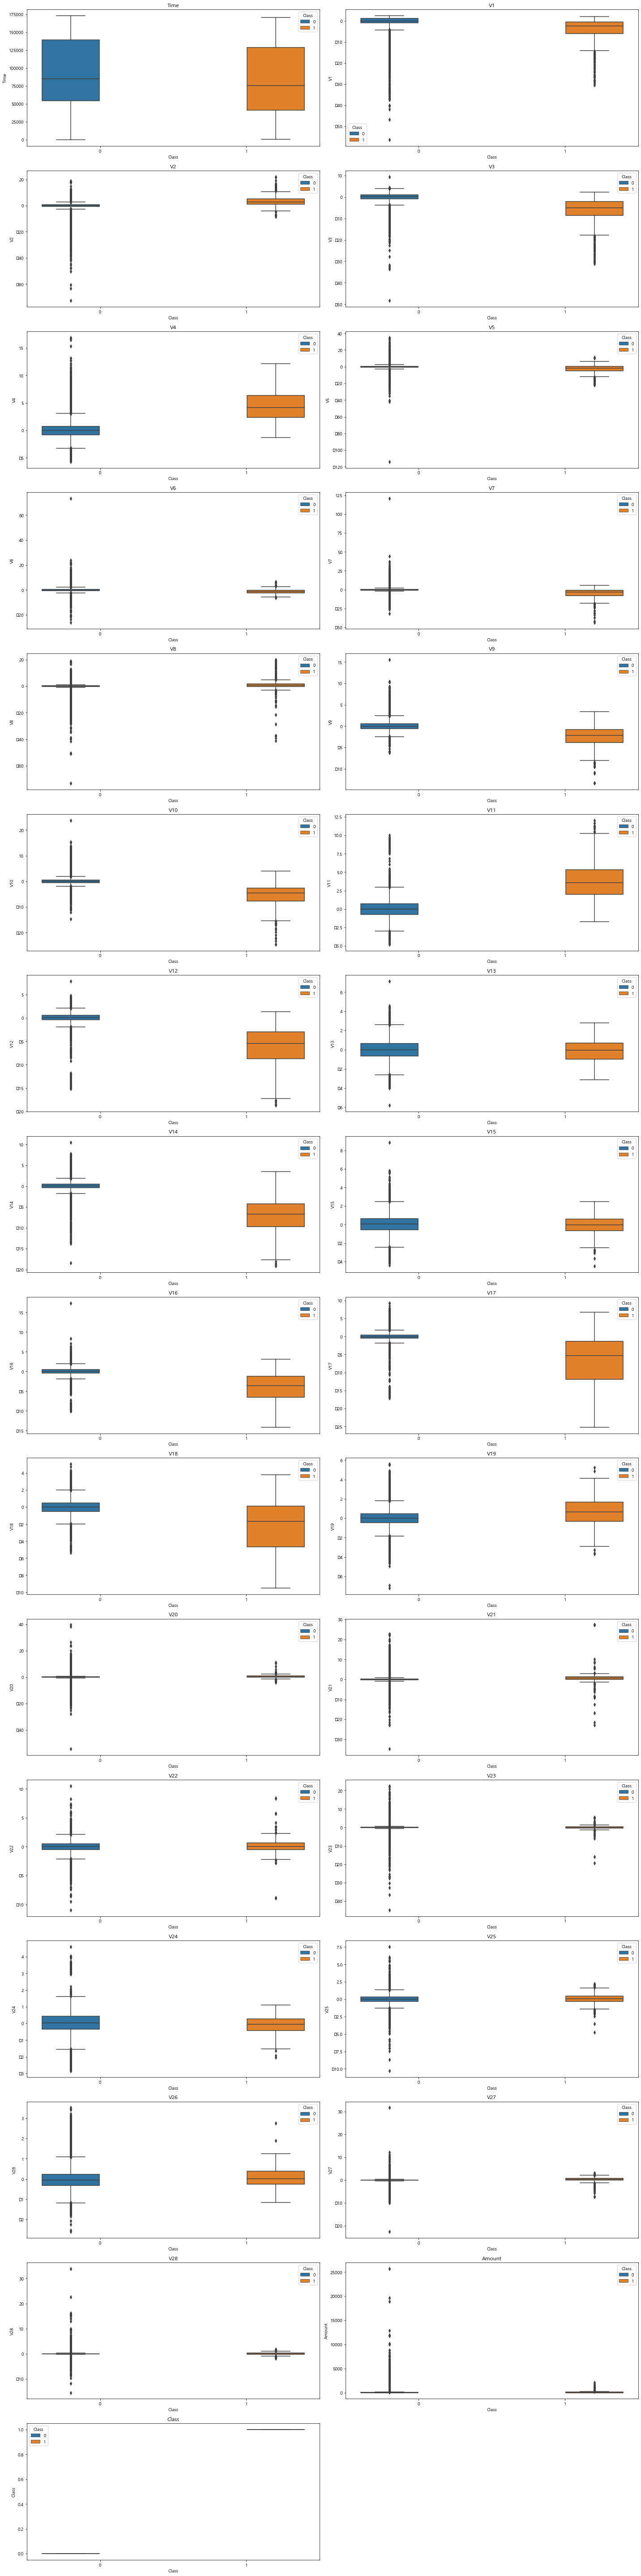

In [44]:
plt.figure(figsize=(20,80))

n = 1

for col in df6.columns:
    ax = plt.subplot(len(df6.columns)//2+1,2,n)
    sns.boxplot(x='Class', y=col, hue='Class', data=df6)
    plt.title("{}".format(col))
    n += 1

plt.tight_layout()
plt.show()

In [45]:
# 스케일링 진행 ( 이상치가 많으므로 이상치에 덜 민감한 robust로 진행)

from sklearn.preprocessing import RobustScaler

X = df6.drop(['Class'], axis = 1)
y = df6['Class']

scaler = RobustScaler()
scaled_X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
scaled_X


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.994983,-0.616237,-0.098602,1.228905,0.878152,-0.217859,0.631245,0.177406,0.142432,0.334787,...,0.910463,0.026866,0.253109,-0.320791,0.032681,0.167619,-0.241182,0.816731,-0.246091,1.783274
1,-0.994983,0.524929,0.143100,-0.006970,0.293974,0.087726,0.164395,-0.105740,0.117064,-0.164482,...,-0.019150,-0.473332,-0.602719,0.363442,-0.479557,0.225462,0.313475,-0.063781,0.026519,-0.269825
2,-0.994972,-0.615587,-1.002407,0.830932,0.251024,-0.344345,1.778007,0.668164,0.420388,-1.179796,...,1.703959,0.668917,0.714254,2.974603,-0.919589,-0.515430,-0.153111,-0.350218,-0.540962,4.983721
3,-0.994972,-0.440239,-0.178789,0.841250,-0.529808,0.033775,1.303832,0.175637,0.662489,-1.076888,...,-0.422194,-0.190105,-0.001408,-0.578786,-1.531963,0.944482,-0.298959,0.379163,0.382611,1.418291
4,-0.994960,-0.526089,0.579239,0.713861,0.265632,-0.270695,0.317183,0.491625,-0.546463,0.700808,...,1.366227,0.048266,0.739092,-0.407980,0.126293,-0.333308,0.976221,1.347133,1.553716,0.670579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.034951,-5.321622,7.135767,-5.222589,-1.285699,-4.073679,-1.999082,-4.409307,13.588260,1.585066,...,4.461946,0.585633,0.098124,3.314091,-0.693006,2.126512,0.532055,5.820867,6.190862,-0.296653
284803,1.034963,-0.335820,-0.085979,0.967471,-0.451476,0.707747,1.142041,-0.014027,0.508439,0.512990,...,0.354148,0.587444,0.856848,0.076436,-1.331299,-0.933155,-0.604145,0.414680,-0.493534,0.038986
284804,1.034975,0.850377,-0.261532,-1.788463,-0.337932,2.059687,2.832770,-0.299623,1.280019,0.390154,...,0.185279,0.630455,0.533612,-0.085005,0.754500,0.373060,-0.062034,0.019227,-0.288058,0.641096
284805,1.034975,-0.115629,0.331602,0.272567,0.445763,-0.248270,0.769496,-0.645865,1.225405,0.357606,...,0.550857,0.710499,0.740745,-0.491472,0.103549,-0.877058,1.054357,0.663921,0.710829,-0.167680


In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.3, shuffle = True, stratify = y, random_state = 1)

In [47]:
# 불균형데이터를 처리하기 위해 SMOTE 진행

from imblearn.over_sampling import SMOTE

sm = SMOTE(k_neighbors = 5)
X_upsampled, y_upsampled = sm.fit_resample(X_train, y_train)

In [48]:
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [49]:
y_upsampled.value_counts()

0    199020
1    199020
Name: Class, dtype: int64

In [50]:
# 차원 축소

from sklearn.decomposition import PCA

pca = PCA(n_components = len(X_upsampled.columns))  #처음에는 feature의 갯수만큼 입력
pca_fit = pca.fit(X_upsampled)

In [51]:
print("\n ==================== PCA Result Summary ===================")
print("\n고유 값 : \n",pca.singular_values_)
print("\n분산 설명력: \n", pca.explained_variance_ratio_)  # 고유값이 가장 큰게 분산 설명력이 가장높음


 ==================== PCA Result Summary ===================

고유 값 : 
 [7866.27461985 5322.62188178 4465.84335784 2852.82243977 2302.86040839
 2197.03911516 1988.04357619 1844.93648416 1688.78078512 1163.45307521
  747.11547379  711.45438429  705.2624732   674.21850636  612.18479919
  565.32604796  520.40948569  509.60307601  492.18764221  474.07683596
  461.58574584  444.63264031  424.9192524   413.17258563  404.13228006
  393.52155198  382.85376031  363.22899855  204.45080439  200.48878811]

분산 설명력: 
 [4.26359463e-01 1.95204097e-01 1.37418331e-01 5.60773113e-02
 3.65403687e-02 3.32593132e-02 2.72326245e-02 2.34531152e-02
 1.96509819e-02 9.32685966e-03 3.84603437e-03 3.48764135e-03
 3.42719843e-03 3.13212465e-03 2.58227673e-03 2.20209318e-03
 1.86607075e-03 1.78937671e-03 1.66916438e-03 1.54858543e-03
 1.46805551e-03 1.36219845e-03 1.24408632e-03 1.17625287e-03
 1.12534266e-03 1.06702536e-03 1.00995851e-03 9.09072929e-04
 2.88015159e-04 2.76960529e-04]


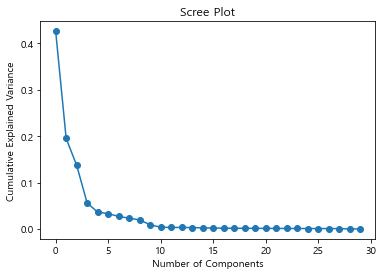

In [52]:
# Scree Plot


plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.plot(pca.explained_variance_ratio_,'o-')


In [53]:
pca = PCA(n_components = 5)
pca_fit = pca.fit(X_upsampled)

X_pca_train = pca_fit.transform(X_upsampled)
X_pca_test = pca_fit.transform(X_test)

# pca transform 후 데이터프레임으로 변경

pcaDF = pca.transform(X_upsampled)
pcaDF = pd.DataFrame(pcaDF, columns = ['component 0', 'component 1', 'component 2', 'component 3', 'component 4'])

pcaDF

,component 0,component 1,component 2,component 3,component 4
0,7.859456,-1.750165,-1.142976,-1.071872,-0.109469
1,6.930972,-2.456225,-1.851402,-1.647801,1.692083
2,7.971059,1.816701,-4.757026,-5.137758,-1.275547
3,7.506202,-1.610536,-0.854662,-1.065800,0.740834
4,7.794017,-1.221426,-1.339351,-0.968768,0.353188
...,...,...,...,...,...
398035,14.193574,21.085961,-5.270693,17.367529,1.878454
398036,-1.177555,-1.580728,1.995882,2.880323,-2.631848
398037,-11.365769,-2.179931,2.356208,0.590571,3.648770
398038,-1.525318,3.184115,-0.683603,6.056615,2.047766


In [54]:
# pca 주성분 설명력 출력

pca.explained_variance_ratio_

array([0.42635946, 0.1952041 , 0.13741833, 0.05607731, 0.03654037])

In [55]:
sum(pca.explained_variance_ratio_)  # 5가지의 주성분이 총 30차원의 데이터 분포중 약 85%를 설명

0.8515995712506623

2) 모델 적용

In [56]:
from sklearn.metrics import accuracy_score

result_accuracy = []

def metrics(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    result_accuracy.append(accuracy)
    
    print("정확도(accuarcy): ", accuracy, "\n")

In [57]:
import time

result_time = []

def modeling(X_train, X_test, y_train, y_test, model):
    start = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    end = time.time() -start
    
    result_time.append(end)
    
    print('시간 : ', end)
    metrics(y_test, y_pred)

In [58]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

rf = RandomForestClassifier()
xgb = XGBClassifier()
lr = LogisticRegression()

In [59]:
# 랜덤포레스트

modeling(X_pca_train, X_pca_test, y_upsampled, y_test, rf)

시간 :  92.42816281318665
정확도(accuarcy):  0.9980571843217115 



In [60]:
# XGB 부스팅

modeling(X_pca_train, X_pca_test, y_upsampled, y_test, xgb)

시간 :  23.46200156211853
정확도(accuarcy):  0.968622356424751 



In [61]:
# 로지스틱 분류

modeling(X_pca_train, X_pca_test, y_upsampled, y_test, lr)

시간 :  0.7395052909851074
정확도(accuarcy):  0.9841297707243425 



3) 모델 평가

In [62]:
# 시간 기준

result_time_df = pd.DataFrame(result_time, columns = ['Time'],
                             index = ['Random Forest', 'XGBoosting', 'Logistic Regression'])
result_time_df.sort_values(by = ['Time'], ascending = True)

,Time
Logistic Regression,0.739505
XGBoosting,23.462002
Random Forest,92.428163


In [63]:
# 정확도 기준

result_accuracy_df = pd.DataFrame(result_accuracy, columns = ['Accuracy'],
                             index = ['Random Forest', 'XGBoosting', 'Logistic Regression'])
result_accuracy_df.sort_values(by = ['Accuracy'], ascending = False)

,Accuracy
Random Forest,0.998057
Logistic Regression,0.984130
XGBoosting,0.968622
